# Index Correlation

### Load Indexes

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
import chardet

def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [126]:
# Dataset Files
educ_idx_info_geo_file = "/Users/mariatormo02/Desktop/TFG-Code/2.2 Index Info/educ_index_data_geo.csv"
health_idx_info_geo_file = "/Users/mariatormo02/Desktop/TFG-Code/2.2 Index Info/health_index_data_geo.csv"
context_idx_file = "/Users/mariatormo02/Desktop/TFG-Code/2.3 Index Construction/context_index_info.csv"
health_idx_file = "/Users/mariatormo02/Desktop/TFG-Code/2.3 Index Construction/health_index.csv"
educ_idx_file = "/Users/mariatormo02/Desktop/TFG-Code/2.3 Index Construction/education_index.csv"

encoded = detect_encoding(educ_idx_info_geo_file)
print(encoded)

# Read CSV
educ_idx_info_geo_df = pd.read_csv(educ_idx_info_geo_file, encoding='utf-8')
health_idx_info_geo_df = pd.read_csv(health_idx_info_geo_file, encoding='utf-8')
educ_idx_df = pd.read_csv(educ_idx_file, encoding='utf-8')
health_idx_df = pd.read_csv(health_idx_file, encoding='utf-8')
context_idx_df = pd.read_csv(context_idx_file, encoding='utf-8')

utf-8


In [127]:
educ_idx_info_geo_df.index = educ_idx_info_geo_df.index + 1
health_idx_info_geo_df.index = health_idx_info_geo_df.index + 1
educ_idx_df.index = educ_idx_df.index + 1
educ_idx_df.drop(columns={'Unnamed: 0'}, inplace=True)
health_idx_df.index = health_idx_df.index + 1
health_idx_df.drop(columns={'Unnamed: 0'}, inplace=True)
context_idx_df.index = context_idx_df.index + 1
context_idx_df.drop(columns={'Unnamed: 0'}, inplace=True)

In [128]:
#educ_idx_df.head(5)
health_idx_df.head(5)
#context_idx_df.head(5) Territorial Socioeconomic Index (IST), Avg. Gini Index (%)

,Health Accessibility,Health Offer Quality,Population Health,Health Index,Neighborhood Name
1,0.278195,0.8,0.491099,0.195699,el Raval
2,0.157895,0.8,0.386773,0.190374,el Barri Gòtic
3,0.097744,1.0,0.415983,0.227254,la Barceloneta
4,0.195489,0.8,0.351214,0.214758,"Sant Pere, Santa Caterina i la Ribera"
5,0.210526,0.8,0.266956,0.247857,el Fort Pienc


### Add Precise IST and Gini values (were formatted for visualizations)

In [129]:
# IST
# Dataset Files
socioec_idx_file = "/Users/mariatormo02/Desktop/TFG-Code/Data/Context Index Data/IST.csv"

# Read CSV
socioec_idx_df = pd.read_csv(socioec_idx_file, encoding='utf-8', sep='\t')


# Only last year included
socioec_idx_df = socioec_idx_df[socioec_idx_df['any'] == 2020]

# Drop useless cols and renaming
socioec_idx_df = socioec_idx_df.drop(columns={'any', 'estat', 'concepte'})
socioec_idx_df.rename(columns={'barris de Barcelona': 'Neighborhood Name', 'valor': 'Territorial Socioeconomic Index (IST)'}, inplace=True)

# Reset indices
socioec_idx_df.reset_index(drop=True, inplace=True)
socioec_idx_df.index = socioec_idx_df.index + 1
socioec_idx_df.index.name = 'Neighborhood ID'
socioec_idx_df = socioec_idx_df.drop(socioec_idx_df.index[73])

# Merge
context_idx_df['Territorial Socioeconomic Index (IST)'] = socioec_idx_df['Territorial Socioeconomic Index (IST)']

# Replace COMA with POINT for decimals in the "Territorial Socioeconomic Index (IST)" column
context_idx_df['Territorial Socioeconomic Index (IST)'] = context_idx_df['Territorial Socioeconomic Index (IST)'].str.replace(',', '.')

# Convert the column to numeric data type
context_idx_df['Territorial Socioeconomic Index (IST)'] = pd.to_numeric(context_idx_df['Territorial Socioeconomic Index (IST)'])
context_idx_df.head(5)

,Neighborhood ID,Neighborhood Name,District Name Associated,Territorial Socioeconomic Index (IST),Avg. Gini Index (%),Population Density (hab/ha),Net Population Density (hab/residential ha),Geo WGS84
1,1,el Raval,Ciutat Vella,78.2,34,429,952,"POLYGON ((2.16473952857229 41.3859611263672, 2..."
2,2,el Barri Gòtic,Ciutat Vella,75.6,39,268,639,"POLYGON ((2.17703981017875 41.3852793578426, 2..."
3,3,la Barceloneta,Ciutat Vella,95.8,34,124,1081,"POLYGON ((2.1962542114702 41.3874852975771, 2...."
4,4,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,100.8,37,199,683,"POLYGON ((2.18347683856251 41.390642940051, 2...."
5,5,el Fort Pienc,Eixample,111.0,32,336,930,"POLYGON ((2.18355273505655 41.3922993404645, 2..."


In [130]:
# AVG. GINI INDEX
# Dataset Files
gini_idx_file = "/Users/mariatormo02/Desktop/TFG-Code/Data/Context Index Data/2021_renda_index_gini.csv"

# Read CSV
gini_idx_df = pd.read_csv(gini_idx_file, encoding='utf-8')

# Drop useless cols and renaming
gini_idx_df = gini_idx_df.drop(columns={'Any', 'Codi_Districte', 'Nom_Districte'})
gini_idx_df.rename(columns={'Codi_Barri': 'Neighborhood ID', 'Nom_Barri': 'Neighborhood Name', 'Index_Gini': 'Gini Index'}, inplace=True)

# Compute Avg Gini Index per Neighborhood ID
avg_gini_df = gini_idx_df.groupby('Neighborhood ID')['Gini Index'].mean()

# Into sorted Dataframe by ID
avg_gini_df = avg_gini_df.reset_index()
avg_gini_df.index = avg_gini_df.index + 1
avg_gini_df.rename(columns={'Gini Index': 'Avg. Gini Index (%)'}, inplace=True)
avg_gini_df.drop(columns={'Neighborhood ID'}, inplace=True)

# Merge into zones dataset (round to 3 decimal places)
avg_gini_df['Avg. Gini Index (%)'] = avg_gini_df['Avg. Gini Index (%)'].round(3)
context_idx_df['Avg. Gini Index (%)'] = avg_gini_df['Avg. Gini Index (%)']
context_idx_df.head(5)

,Neighborhood ID,Neighborhood Name,District Name Associated,Territorial Socioeconomic Index (IST),Avg. Gini Index (%),Population Density (hab/ha),Net Population Density (hab/residential ha),Geo WGS84
1,1,el Raval,Ciutat Vella,78.2,34.495,429,952,"POLYGON ((2.16473952857229 41.3859611263672, 2..."
2,2,el Barri Gòtic,Ciutat Vella,75.6,39.133,268,639,"POLYGON ((2.17703981017875 41.3852793578426, 2..."
3,3,la Barceloneta,Ciutat Vella,95.8,33.636,124,1081,"POLYGON ((2.1962542114702 41.3874852975771, 2...."
4,4,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,100.8,37.031,199,683,"POLYGON ((2.18347683856251 41.390642940051, 2...."
5,5,el Fort Pienc,Eixample,111.0,32.475,336,930,"POLYGON ((2.18355273505655 41.3922993404645, 2..."


## Study Correlations

In [131]:
correlation_df = pd.merge(health_idx_df,educ_idx_df)
correlation_dfs = pd.merge(correlation_df, context_idx_df)
correlation_dfs = correlation_dfs[['Health Index', 'Education Index', 'Territorial Socioeconomic Index (IST)', 'Population Density (hab/ha)']]
display(correlation_dfs)

,Health Index,Education Index,Territorial Socioeconomic Index (IST),Population Density (hab/ha)
0,0.195699,0.627308,78.2,429
1,0.190374,0.392020,75.6,268
2,0.227254,0.371848,95.8,124
3,0.214758,0.598735,100.8,199
4,0.247857,0.515632,111.0,336
...,...,...,...,...
68,0.211816,0.382011,116.6,109
69,0.143076,0.418954,72.4,212
70,0.075264,0.393519,107.0,193
71,0.079305,0.462287,102.9,355


### 1. Correlation between Indexes (Education & Health)

                 Education Index  Health Index
Education Index         1.000000      0.700819
Health Index            0.700819      1.000000


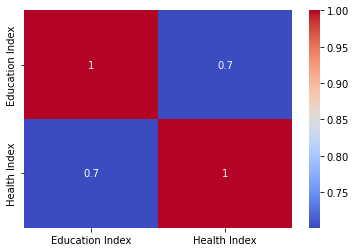

In [132]:
# Compute correlation matrix
correlation_matrix = correlation_df[['Education Index', 'Health Index']].corr()
print(correlation_matrix)

# Visualize with heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### 2. Correlation between Indexes (Education & Health) and Contextual Factors

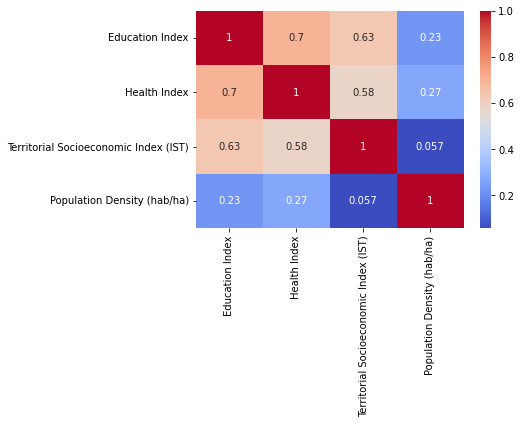

In [133]:
# Compute correlation matrix
correlation_matrix_total = correlation_dfs[['Education Index', 'Health Index', 'Territorial Socioeconomic Index (IST)', 'Population Density (hab/ha)']].corr()
#print(correlation_matrix_total)

# Visualize with heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix_total, annot=True, cmap='coolwarm')
plt.show()

### 3. Correlation between Index Terms (Education)

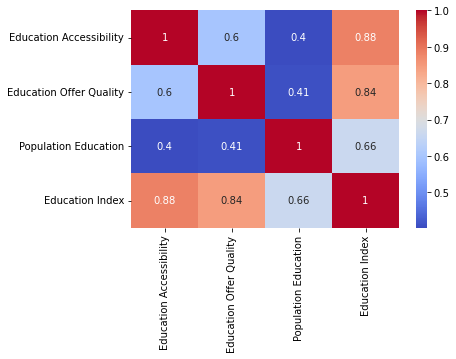

In [134]:
# Compute correlation matrix
educ_corr_matrix = educ_idx_df[['Education Accessibility', 'Education Offer Quality', 'Population Education', 'Education Index']].corr()
#print(educ_corr_matrix)

# Visualize with heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(educ_corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### 4. Correlation between Index Terms (Health)

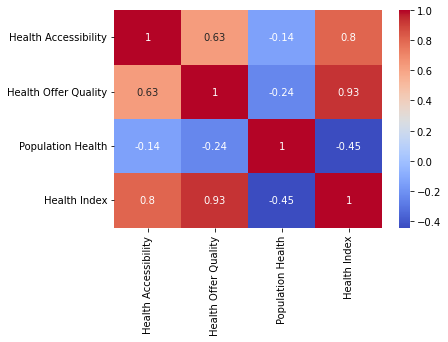

In [135]:
# Compute correlation matrix
health_corr_matrix = health_idx_df[['Health Accessibility', 'Health Offer Quality', 'Population Health', 'Health Index']].corr()
#print(health_corr_matrix)

# Visualize with heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(health_corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Clustering

In [136]:
# Merge Dataframes
merged_df = pd.merge(health_idx_df,educ_idx_df)
merged_dfs = pd.merge(merged_df, context_idx_df)
merged_dfs.drop(columns={'Neighborhood Name', 'District Name Associated', 'Avg. Gini Index (%)', 'Net Population Density (hab/residential ha)', 'Geo WGS84'}, inplace=True)
merged_dfs.index = merged_dfs.index + 1
merged_dfs.head()

,Health Accessibility,Health Offer Quality,Population Health,Health Index,Education Accessibility,Education Offer Quality,Population Education,Education Index,Neighborhood ID,Territorial Socioeconomic Index (IST),Population Density (hab/ha)
1,0.278195,0.8,0.491099,0.195699,0.594595,0.833333,0.453996,0.627308,1,78.2,429
2,0.157895,0.8,0.386773,0.190374,0.162162,0.500000,0.513897,0.392020,2,75.6,268
3,0.097744,1.0,0.415983,0.227254,0.297297,0.333333,0.484912,0.371848,3,95.8,124
4,0.195489,0.8,0.351214,0.214758,0.459459,0.777778,0.558967,0.598735,4,100.8,199
5,0.210526,0.8,0.266956,0.247857,0.243243,0.694444,0.609208,0.515632,5,111.0,336


In [137]:
# K-Means
from sklearn.cluster import KMeans
import numpy as np

# Seleccionamos las columnas que contienen los factores
features = merged_dfs.drop('Neighborhood ID', axis=1)

# Inicializamos el modelo K-means
kmeans = KMeans(n_clusters=3, random_state=42)

# Ajustamos el modelo a nuestros datos
kmeans.fit(features)

# Agregamos las etiquetas de los clusters al DataFrame
merged_dfs['Cluster'] = kmeans.labels_
merged_dfs.head(5)

,Health Accessibility,Health Offer Quality,Population Health,Health Index,Education Accessibility,Education Offer Quality,Population Education,Education Index,Neighborhood ID,Territorial Socioeconomic Index (IST),Population Density (hab/ha),Cluster
1,0.278195,0.8,0.491099,0.195699,0.594595,0.833333,0.453996,0.627308,1,78.2,429,0
2,0.157895,0.8,0.386773,0.190374,0.162162,0.500000,0.513897,0.392020,2,75.6,268,2
3,0.097744,1.0,0.415983,0.227254,0.297297,0.333333,0.484912,0.371848,3,95.8,124,1
4,0.195489,0.8,0.351214,0.214758,0.459459,0.777778,0.558967,0.598735,4,100.8,199,2
5,0.210526,0.8,0.266956,0.247857,0.243243,0.694444,0.609208,0.515632,5,111.0,336,2


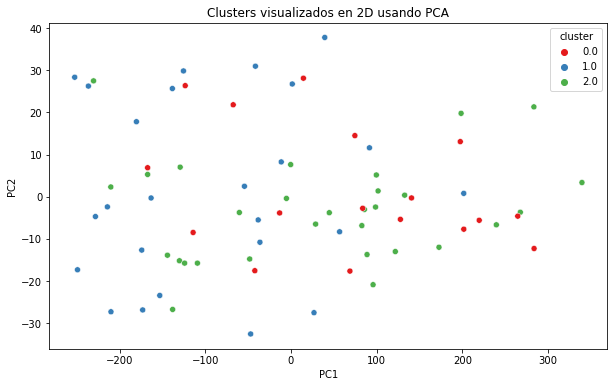

                                              PC1        PC2
Health Accessibility                     0.036380  -0.061417
Health Offer Quality                     0.062295  -0.113119
Population Health                       -0.009722   0.052783
Health Index                             0.036132  -0.075773
Education Accessibility                  0.014321  -0.101373
Education Offer Quality                  0.058887  -0.062559
Population Education                     0.021794  -0.096185
Education Index                          0.031667  -0.086706
Territorial Socioeconomic Index (IST)    0.969374 -16.693579
Population Density (hab/ha)            154.342106   0.104993


,Health Accessibility,Health Offer Quality,Population Health,Health Index,Education Accessibility,Education Offer Quality,Population Education,Education Index,Neighborhood ID,Territorial Socioeconomic Index (IST),Population Density (hab/ha)
Cluster,,,,,,,,,,,
0,0.198142,0.788235,0.304320,0.227352,0.263911,0.687908,0.523339,0.491719,32.764706,104.123529,463.294118
1,0.096541,0.648000,0.309241,0.145100,0.215135,0.536667,0.477135,0.409646,39.760000,102.856000,81.800000
2,0.194519,0.703226,0.280264,0.205827,0.240628,0.617384,0.520688,0.459566,37.096774,103.974194,276.483871


In [143]:
# VISUALIZATION
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplicamos PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
components = pca.fit_transform(features)

# Creamos un DataFrame con las componentes principales y las etiquetas de los clusters
df_pca = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
df_pca['cluster'] = merged_dfs['Cluster']

# Visualizamos los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', palette='Set1')
plt.title('Clusters visualizados en 2D usando PCA')
plt.show()

# Obtener las cargas de los componentes principales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=features.columns)
print(loadings_df)

# Calcular la media de cada factor para cada cluster
cluster_means = merged_dfs.groupby('Cluster').mean()
display(cluster_means)